### **Dataset Simulasi Uji LSP Data Science UDINUS 2024 (Winconsin Breast Cancer)**: [https://bit.ly/dataset-simulasi-lsp-udinus-2024](https://bit.ly/dataset-simulasi-lsp-udinus-2024)

### <b>Daftar Isi</b>
* [1) Mengumpulkan Data](#h1)
* [2) Menelaah Data](#h2)
* [3) Memvalidasi Data](#h3)
* [4) Menetukan Object Data](#h4)
* [5) Membersihkan Data](#h5)
* [6) Mengkonstruksi Data](#h6)
* [7) Menentukan Label Data](#h7)
* [8) Membangung Model](#h8)
* [9) Mengevaluasi Hasil Pemodelan](#h9)
* [10) Optimasi Model Klasifikasi](#h10)

## <b>1) Mengumpulkan Data</b> <a class="anchor" id="h1"></a>

In [ ]:
# Load library yang diperlukan
import pandas as pd         #(Python Data Analysis Library) library Python yang paling umum digunakan untuk analisis data

In [ ]:
# Load data menjadi data frame

#from google.colab import drive
#drive.mount('/content/drive') #mengkases file di google drive

#file_path = '/content/drive/MyDrive/Colab Notebooks/breast-cancer-wisconsin_(simulasi-uji-LSP).csv'

dataset = pd.read_csv('breast-cancer-wisconsin_(simulasi-uji-LSP).csv', header=None)     #header=None, mengindikasikan bahwa tidak ada baris header dalam file CSV Anda

dataset

,0,1,2,3,4,5,6,7,8,9,10
0,1167439,2,3,4,4,2,5.0,2,5,1,4
1,1172152,10,3,3,10,2,10.0,7,3,3,4
2,877943,3,10,3,10,6,10.0,5,1,4,4
3,1166654,10,3,5,1,10,5.0,3,10,2,4
4,1054593,10,5,5,3,6,7.0,7,10,1,4
...,...,...,...,...,...,...,...,...,...,...,...
254,1296593,7,5,9,9,10,NaN,10,8,2,4
255,145447,8,4,4,1,2,9.0,3,3,1,4
256,1180194,9,10,6,2,3,4.0,1,10,5,4
257,659642,10,8,4,4,4,10.0,3,10,4,4


*Lihat <b style="color:yellow;">informasi atribut</b> pada file "<span style="color:orange;">breast-cancer-wisconsin.names</span>", poin ke-<b style="color:tomato;">7</b>.

In [ ]:
# Memasukkan nama fitur kedalam dataset
dataset.columns = [
  "Sample_code_number",
  "Clump_thickness",
  "Uniformity_of_cell_size",
  "Uniformity_of_cell_shape",
  "Marginal_adhesion",
  "Single_epithelial_cell_size",
  "Bare_nuclei",
  "Bland_chromatin",
  "Normal_nucleoli",
  "Mitoses",
  "Class"
]

In [ ]:
# Lakukan pengecekan apakah dataset sudah benar dengan menampilkan 5 data teratas
dataset.head()

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1167439,2,3,4,4,2,5.0,2,5,1,4
1,1172152,10,3,3,10,2,10.0,7,3,3,4
2,877943,3,10,3,10,6,10.0,5,1,4,4
3,1166654,10,3,5,1,10,5.0,3,10,2,4
4,1054593,10,5,5,3,6,7.0,7,10,1,4


## <b>2) Menelaah Data</b> <a class="anchor" id="h2"></a>

In [ ]:
# Menampilkan informasi dari file dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample_code_number           259 non-null    int64  
 1   Clump_thickness              259 non-null    int64  
 2   Uniformity_of_cell_size      259 non-null    int64  
 3   Uniformity_of_cell_shape     259 non-null    int64  
 4   Marginal_adhesion            259 non-null    int64  
 5   Single_epithelial_cell_size  259 non-null    int64  
 6   Bare_nuclei                  251 non-null    float64
 7   Bland_chromatin              259 non-null    int64  
 8   Normal_nucleoli              259 non-null    int64  
 9   Mitoses                      259 non-null    int64  
 10  Class                        259 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 22.4 KB


In [ ]:
# Menampilkan deskripsi dari file dataset
#
dataset.describe()

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,2.590000e+02,259.000000,259.000000,259.000000,259.000000,259.000000,251.000000,259.000000,259.000000,259.000000,259.000000
mean,1.088443e+06,5.691120,4.455598,4.583012,3.880309,4.193050,5.139442,4.633205,4.169884,2.644788,3.266409
std,5.218200e+05,2.812823,3.232730,3.203054,3.192342,2.679485,3.757722,2.676451,3.377149,2.608365,0.965726
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,1.016700e+06,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
50%,1.172152e+06,5.000000,4.000000,4.000000,3.000000,3.000000,5.000000,4.000000,3.000000,1.000000,4.000000
75%,1.222464e+06,8.000000,7.000000,7.000000,6.000000,6.000000,10.000000,7.000000,7.000000,3.000000,4.000000
max,8.233704e+06,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
import seaborn as sns               # library Python untuk visualisasi grafik statistik dari data yang dibangun di atas Matplotlib
import matplotlib.pyplot as plt     #library visualisasi data yang terinspirasi oleh MATLAB

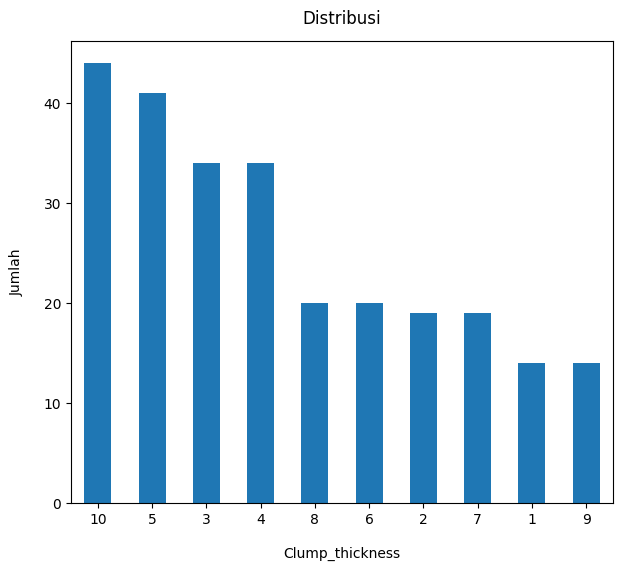

In [ ]:
# tuliskan kode program untuk Menampilkan distribusi kelas dari semua fitur
# dibawah adalah contoh kode program untuk fitur 1

dataset['Clump_thickness'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Clump_thickness", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)     #labelpad = 14 jarak antara label sumbu y dengan sumbu y itu sendiri. Angka 14 di sini menentukan jumlah piksel dari jarak tersebut.
plt.title("Distribusi", y=1.02);      #y=1.02 adalah posisi vertikal dari judul plot relatif terhadap plot itu sendiri. Nilai 1.02 di sini menunjukkan posisi sedikit di atas posisi default judulnya.

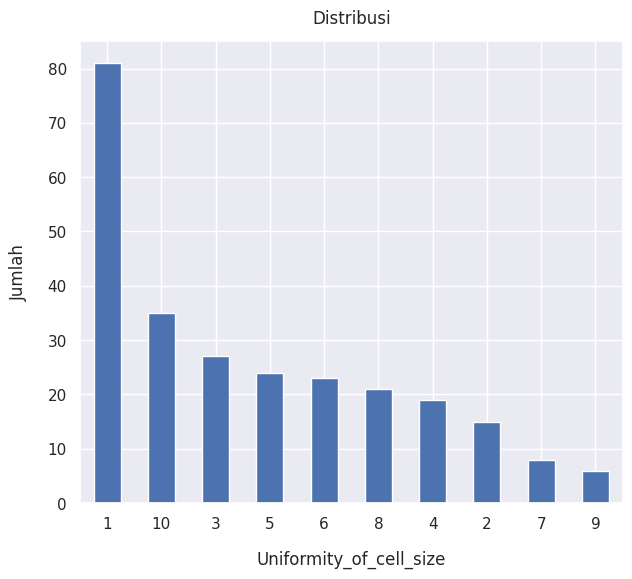

In [ ]:
dataset['Uniformity_of_cell_size'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Uniformity_of_cell_size", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi", y=1.02);

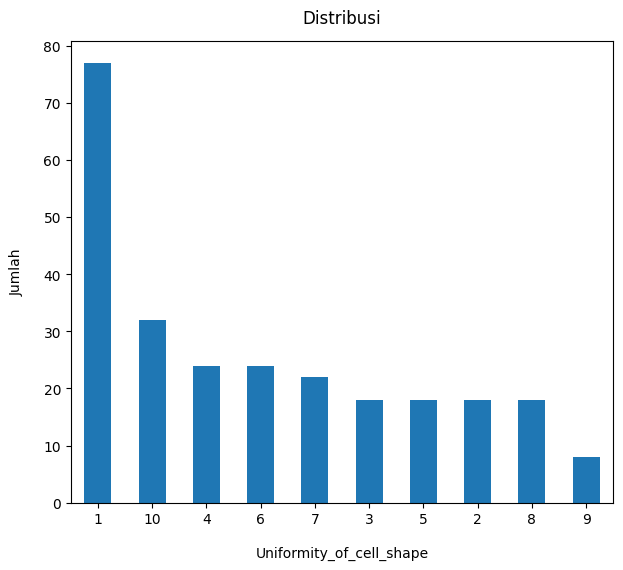

In [ ]:
dataset['Uniformity_of_cell_shape'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Uniformity_of_cell_shape", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi", y=1.02);

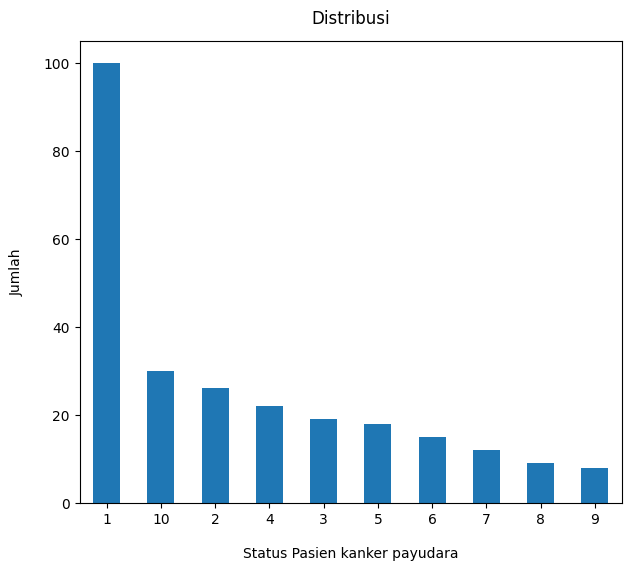

In [ ]:
dataset['Marginal_adhesion'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Status Pasien kanker payudara", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi", y=1.02);

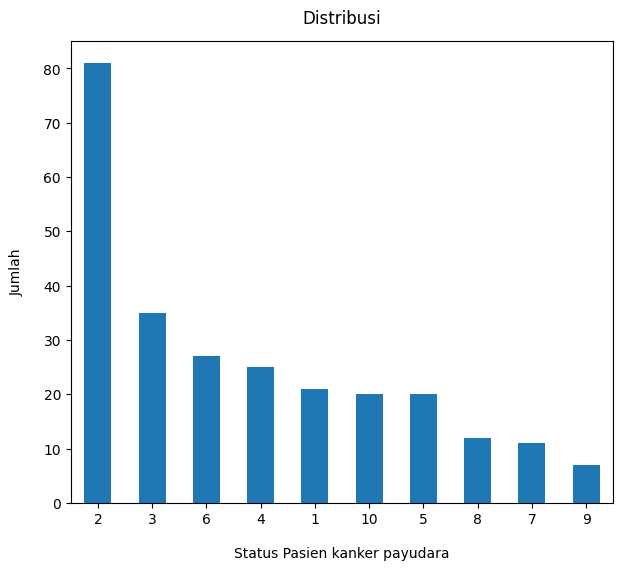

In [ ]:
dataset['Single_epithelial_cell_size'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Status Pasien kanker payudara", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi", y=1.02);

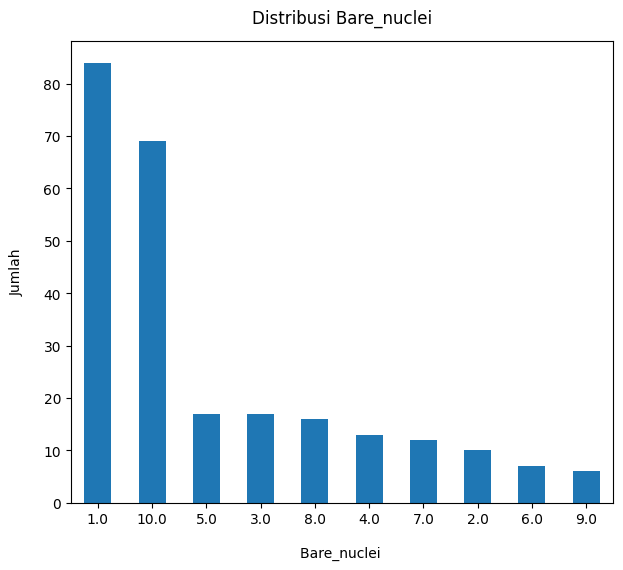

In [ ]:
dataset['Bare_nuclei'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Bare_nuclei ", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Bare_nuclei", y=1.02);

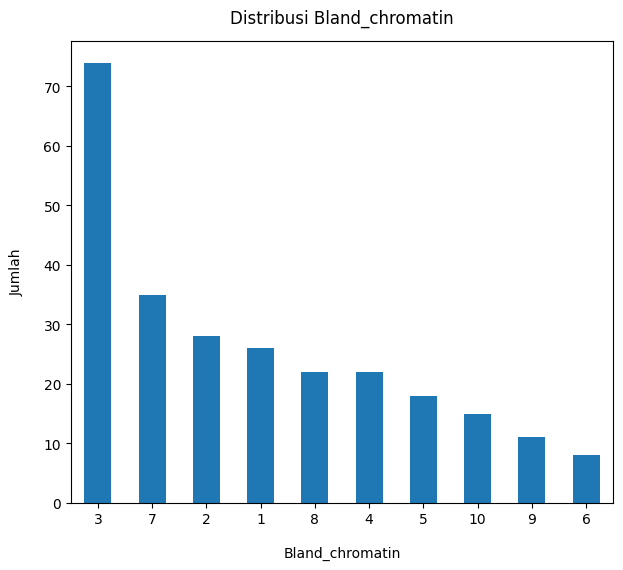

In [ ]:
dataset['Bland_chromatin'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Bland_chromatin", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Bland_chromatin", y=1.02);

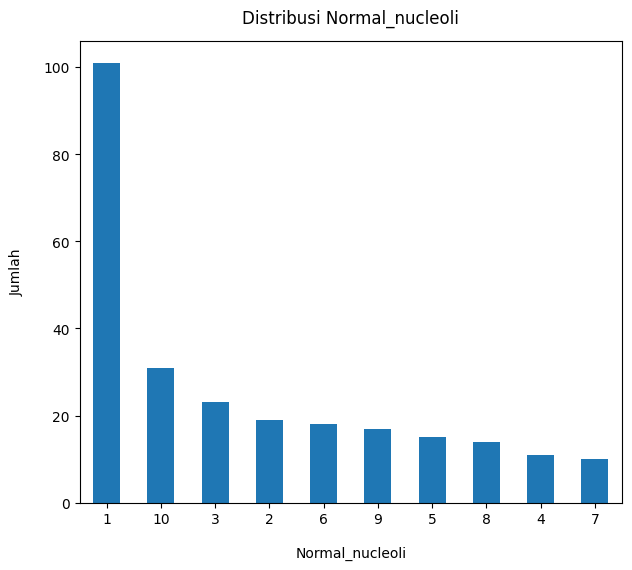

In [ ]:
dataset['Normal_nucleoli'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Normal_nucleoli", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Normal_nucleoli", y=1.02);

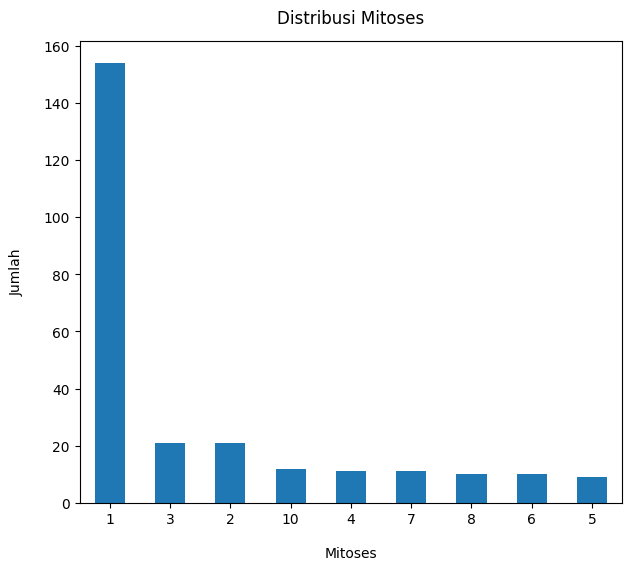

In [ ]:
dataset['Mitoses'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Mitoses", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Mitoses", y=1.02);

for i, counts in enumerate(plot_data):      #Fungsi enumerate() mengiterasi plot_data, yang diasumsikan sebagai daftar nilai-nilai yang akan di-plot. Fungsi ini mengembalikan pasangan indeks dan nilai (i, counts)
  plt.text(i, counts, str(counts), ha='center')

Class
4    164
2     95
Name: count, dtype: int64


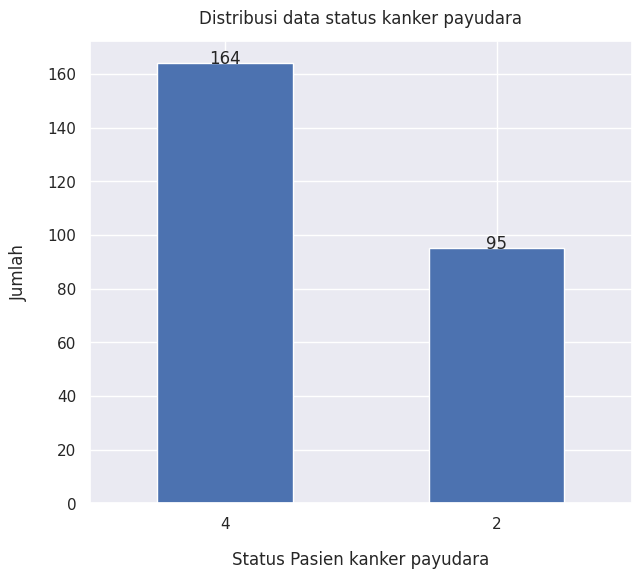

In [ ]:
#plot_dat = dataset['Class'].replace({4:"Ganas", 2:"Jinak"}).value_counts()

plot_data = dataset['Class'].value_counts()
print(plot_data)

plot_data.plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Status Pasien kanker payudara", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi data status kanker payudara", y=1.02);

#plt.(0,50, str(154), ha = 'center')

for i, counts in enumerate(plot_data):      #Fungsi enumerate() mengiterasi plot_data, yang diasumsikan sebagai daftar nilai-nilai yang akan di-plot. Fungsi ini mengembalikan pasangan indeks dan nilai (i, counts)
  #print("index: {}, value: {}".forma(i, counts))
  plt.text(i, counts, str(counts), ha='center')   #str(counts) Nilai counts dikonversi menjadi string agar bisa ditampilkan sebagai teks
#enumerate
plt.show()

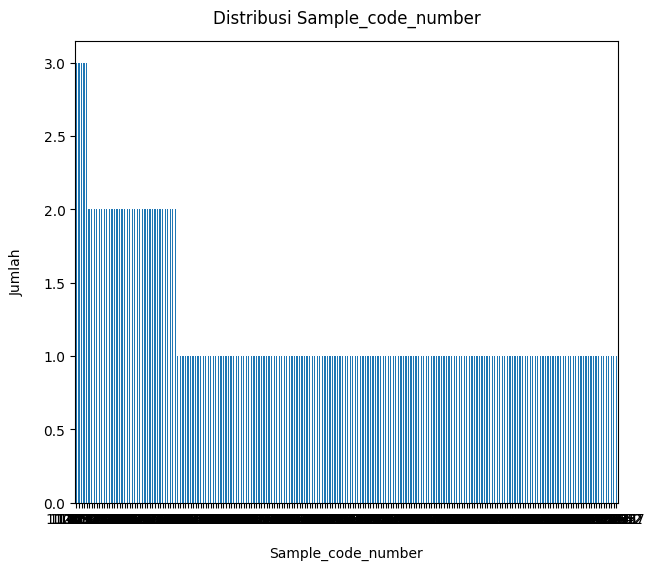

In [ ]:
dataset['Sample_code_number'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Sample_code_number", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Sample_code_number", y=1.02);

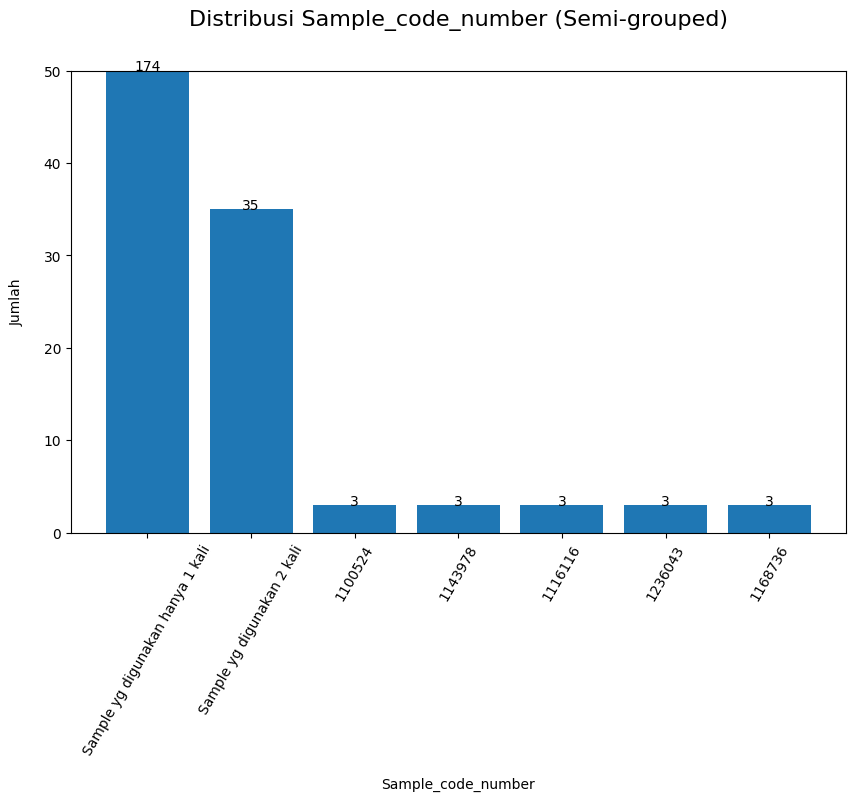

In [ ]:
sample_code_number = dataset['Sample_code_number'].value_counts()

scn_dict = {
  'Sample yg digunakan hanya 1 kali': 0,
  'Sample yg digunakan 2 kali': 0,
}

for key, count in sample_code_number.items():
  if count > 2:
    scn_dict[str(key)] = count
  if count == 1:
    scn_dict['Sample yg digunakan hanya 1 kali'] += 1
  if count == 2:
    scn_dict['Sample yg digunakan 2 kali'] += 1

x = list(scn_dict.keys())
y = list(scn_dict.values())

plt.figure(figsize=(10, 6))
plt.bar(x, y)

plt.xlabel("Sample_code_number", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Sample_code_number (Semi-grouped)", fontdict={'size': 16}, y=1.08)

plt.xticks(rotation=60)
plt.ylim(0, 50)

for i in range(len(x)):
  if y[i] < 50:
    plt.text(i, y[i], y[i], ha='center')
  else:
    plt.text(i, 50, y[i], ha='center')

## <b>3) Memvalidasi Data</b> <a class="anchor" id="h3"></a>

Dalam aktivitas ini, Anda harus dapat melakukan pengecekan atas data yang Anda gunakan apakah terdapat missing value, noisy data, atau data yang tidak sesuai lainnya

###Essay 1
Deskripsikan Temuan Anda disini:

*Lihat <b style="color:yellow;">informasi dataset</b> pada file "<span style="color:orange;">breast-cancer-wisconsin.names</span>"

## <b>4) Menentukan Objek Data</b> <a class="anchor" id="h4"></a>

In [ ]:
#menghapus fitur yang tidak dapat digunakan
columns_to_drop = ['Sample_code_number']

dataset = dataset.drop(columns_to_drop, axis=1)     #axis=1 digunakan untuk menghapus kolom

dataset.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,2,3,4,4,2,5.0,2,5,1,4
1,10,3,3,10,2,10.0,7,3,3,4
2,3,10,3,10,6,10.0,5,1,4,4
3,10,3,5,1,10,5.0,3,10,2,4
4,10,5,5,3,6,7.0,7,10,1,4


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              259 non-null    int64  
 1   Uniformity_of_cell_size      259 non-null    int64  
 2   Uniformity_of_cell_shape     259 non-null    int64  
 3   Marginal_adhesion            259 non-null    int64  
 4   Single_epithelial_cell_size  259 non-null    int64  
 5   Bare_nuclei                  251 non-null    float64
 6   Bland_chromatin              259 non-null    int64  
 7   Normal_nucleoli              259 non-null    int64  
 8   Mitoses                      259 non-null    int64  
 9   Class                        259 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 20.4 KB


###Essay 2
Deskripsikan Temuan Anda disini :
Setelah proses menentukan object data, fitur yang digunakan untuk klasifikasi berjumlah 10 fitur


## <b>5) Membersihkan Data</b> <a class="anchor" id="h5"></a>

In [ ]:
# menghitung nilai Null pada dataset
dataset.isnull().sum()

Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    8
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [ ]:
# mendeteksi keberadaan nilai Null
dataset.loc[:, dataset.isnull().any()].columns

Index(['Bare_nuclei'], dtype='object')

In [ ]:
# Menampilkan Informasi dari data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              259 non-null    int64  
 1   Uniformity_of_cell_size      259 non-null    int64  
 2   Uniformity_of_cell_shape     259 non-null    int64  
 3   Marginal_adhesion            259 non-null    int64  
 4   Single_epithelial_cell_size  259 non-null    int64  
 5   Bare_nuclei                  251 non-null    float64
 6   Bland_chromatin              259 non-null    int64  
 7   Normal_nucleoli              259 non-null    int64  
 8   Mitoses                      259 non-null    int64  
 9   Class                        259 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 20.4 KB


In [ ]:
import missingno    #library yang digunakan untuk visualisasi data yang hilang (missing data)

<Axes: >

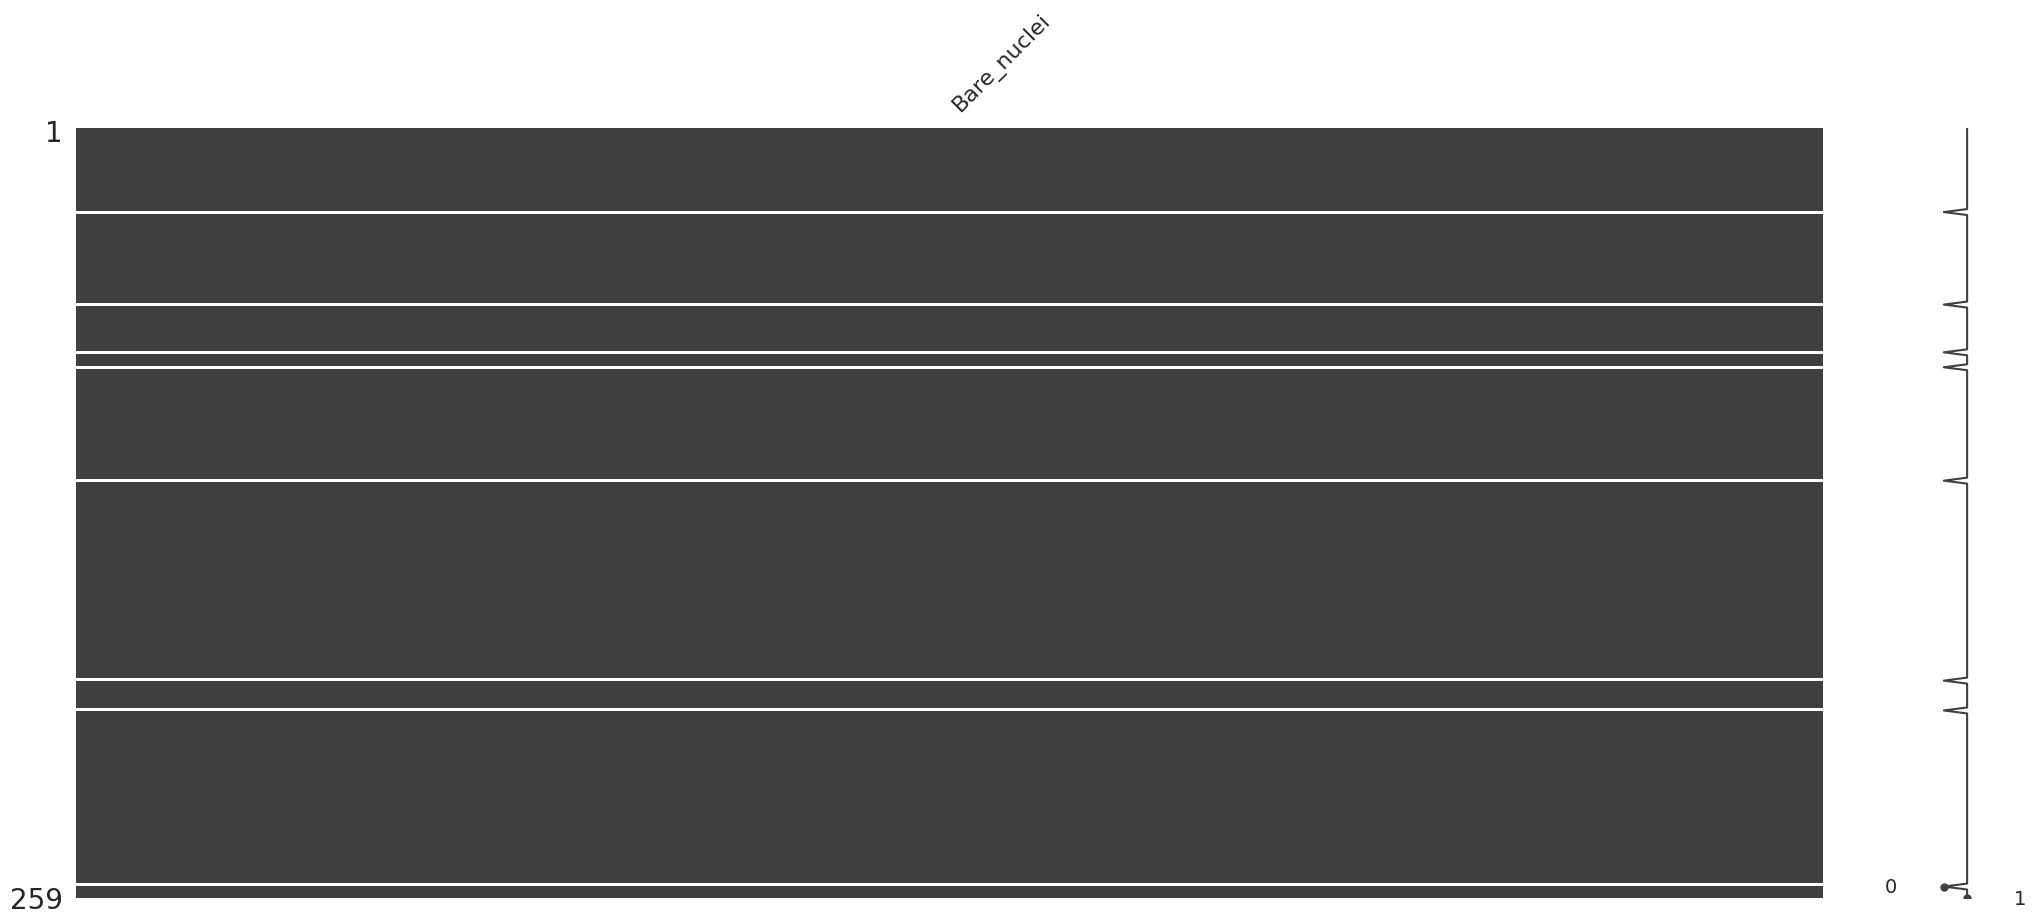

In [ ]:
# Memvisualisasikan keberadaan nilai Null
missingdata_df = dataset.columns[dataset.isnull().any()].tolist()
missingno.matrix(dataset[missingdata_df])

<Axes: >

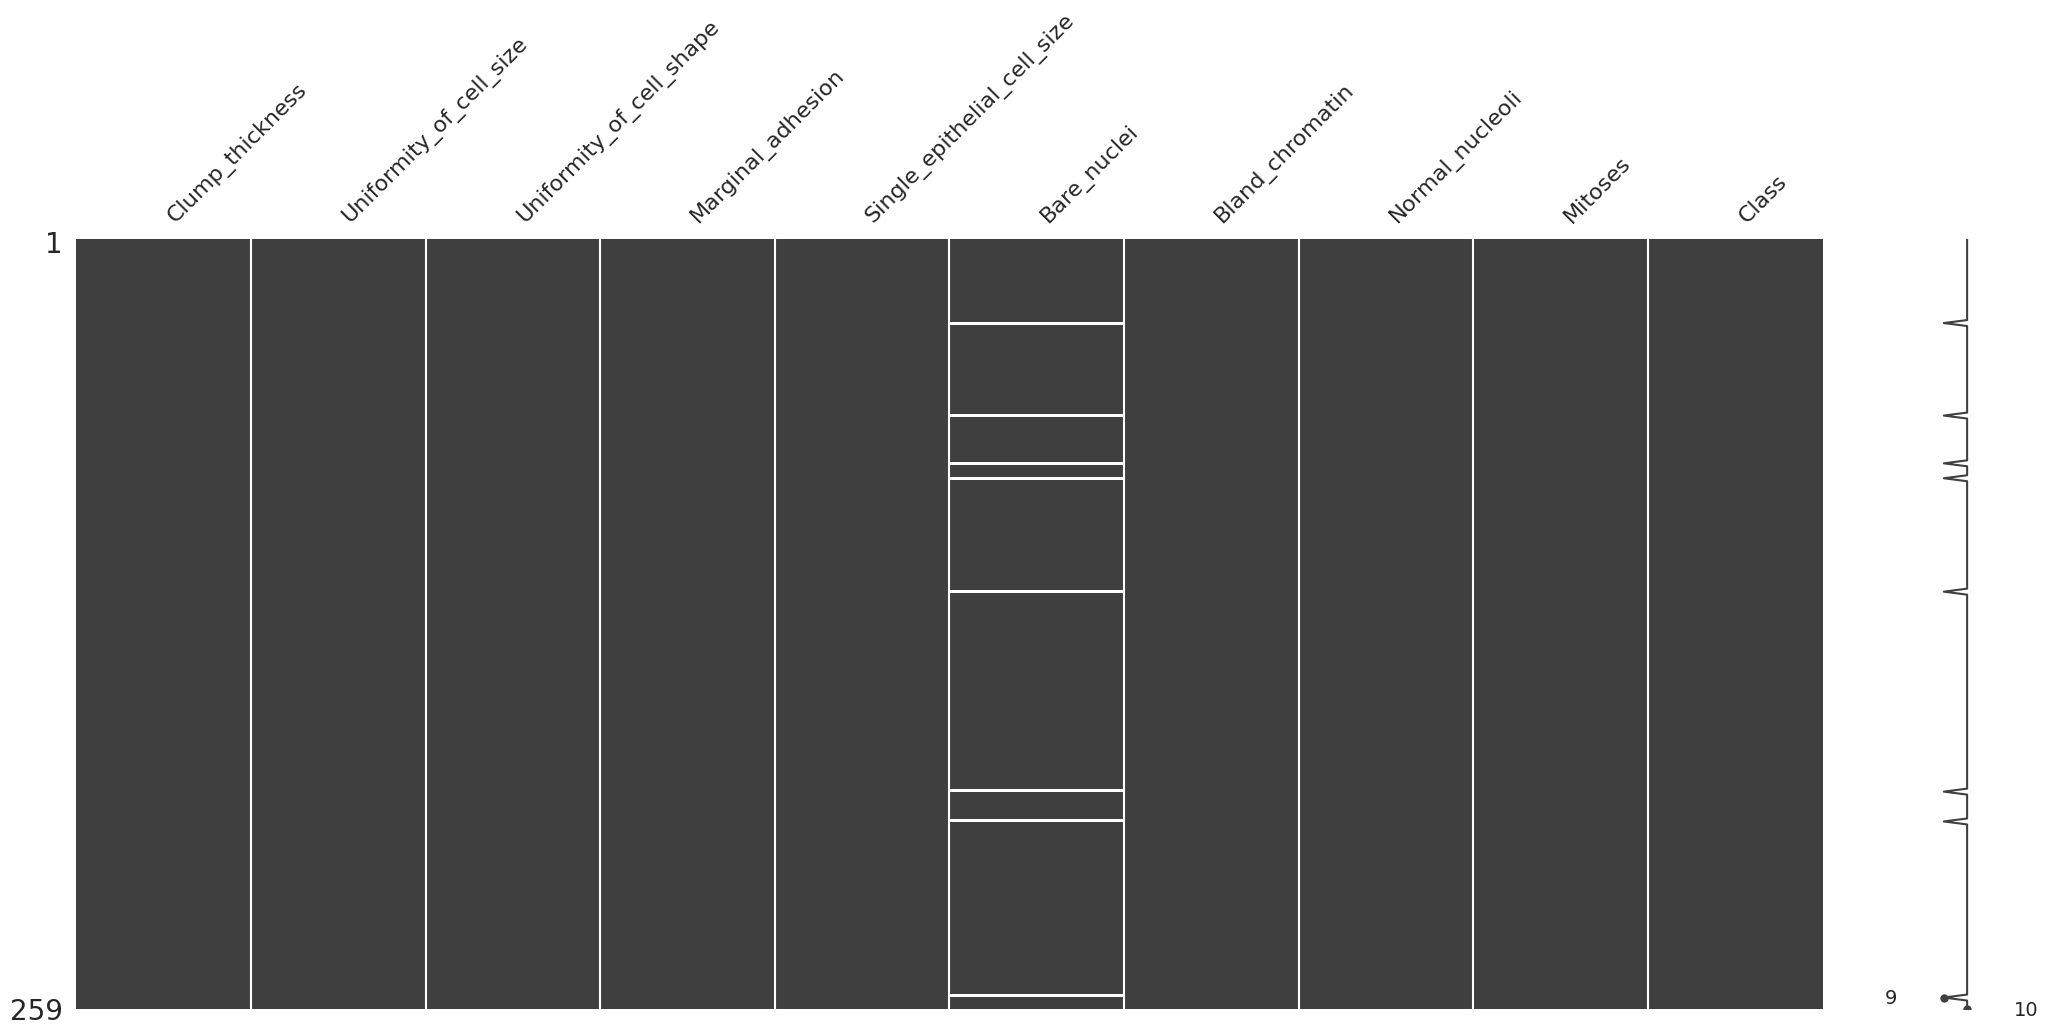

In [ ]:
missingno.matrix(dataset)

In [ ]:
# diiskan jawaban masing-masing
median_value = dataset['Bare_nuclei'].median()
dataset['Bare_nuclei'] = dataset['Bare_nuclei'].fillna(median_value)

In [ ]:
dataset.isnull().sum()

Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [ ]:
# Menampilkan data duplikat
print("All Duplicate Rows:")
dataset[dataset.duplicated(keep=False)]   #keep=False mengembalikan semua baris nilai yang duplikat
#dataset.duplicated().sum()

All Duplicate Rows:


,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
11,1,1,1,1,1,1.0,3,1,1,2
12,5,1,1,1,2,1.0,3,1,1,2
16,3,1,1,1,2,1.0,1,1,1,2
19,4,1,1,1,2,1.0,3,1,1,2
24,9,10,10,1,10,8.0,3,3,1,4
...,...,...,...,...,...,...,...,...,...,...
245,3,1,1,1,2,1.0,1,1,1,2
248,2,1,1,1,2,1.0,3,1,1,2
249,4,1,1,1,2,1.0,3,1,1,2
253,4,1,1,1,2,1.0,3,2,1,2


In [ ]:
# Menghapus data duplikat, menyimpan data dalam variabel dataClean
dataClean = dataset.drop_duplicates()
print("All Duplicate Rows:")
dataClean[dataClean.duplicated(keep=False)]

All Duplicate Rows:


,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              259 non-null    int64  
 1   Uniformity_of_cell_size      259 non-null    int64  
 2   Uniformity_of_cell_shape     259 non-null    int64  
 3   Marginal_adhesion            259 non-null    int64  
 4   Single_epithelial_cell_size  259 non-null    int64  
 5   Bare_nuclei                  259 non-null    float64
 6   Bland_chromatin              259 non-null    int64  
 7   Normal_nucleoli              259 non-null    int64  
 8   Mitoses                      259 non-null    int64  
 9   Class                        259 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 20.4 KB


In [ ]:
dataClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 257
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              200 non-null    int64  
 1   Uniformity_of_cell_size      200 non-null    int64  
 2   Uniformity_of_cell_shape     200 non-null    int64  
 3   Marginal_adhesion            200 non-null    int64  
 4   Single_epithelial_cell_size  200 non-null    int64  
 5   Bare_nuclei                  200 non-null    float64
 6   Bland_chromatin              200 non-null    int64  
 7   Normal_nucleoli              200 non-null    int64  
 8   Mitoses                      200 non-null    int64  
 9   Class                        200 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 17.2 KB


Temuan:

## <b>6) Menkonstruksi Data</b> <a class="anchor" id="h2"></a>

Class
4    160
2     40
Name: count, dtype: int64


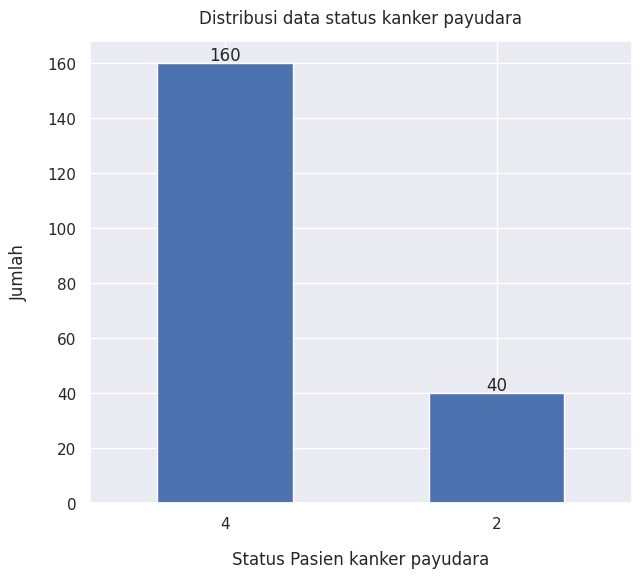

In [ ]:
plot_data = dataClean['Class'].value_counts()
print(plot_data)

plot_data.plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Status Pasien kanker payudara", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi data status kanker payudara", y=1.02)

for i, counts in enumerate(plot_data):
  plt.text(i, (counts + 1), str(counts), ha='center')

plt.show()

###Essay 3
Deskripsikan Temuan Anda disini

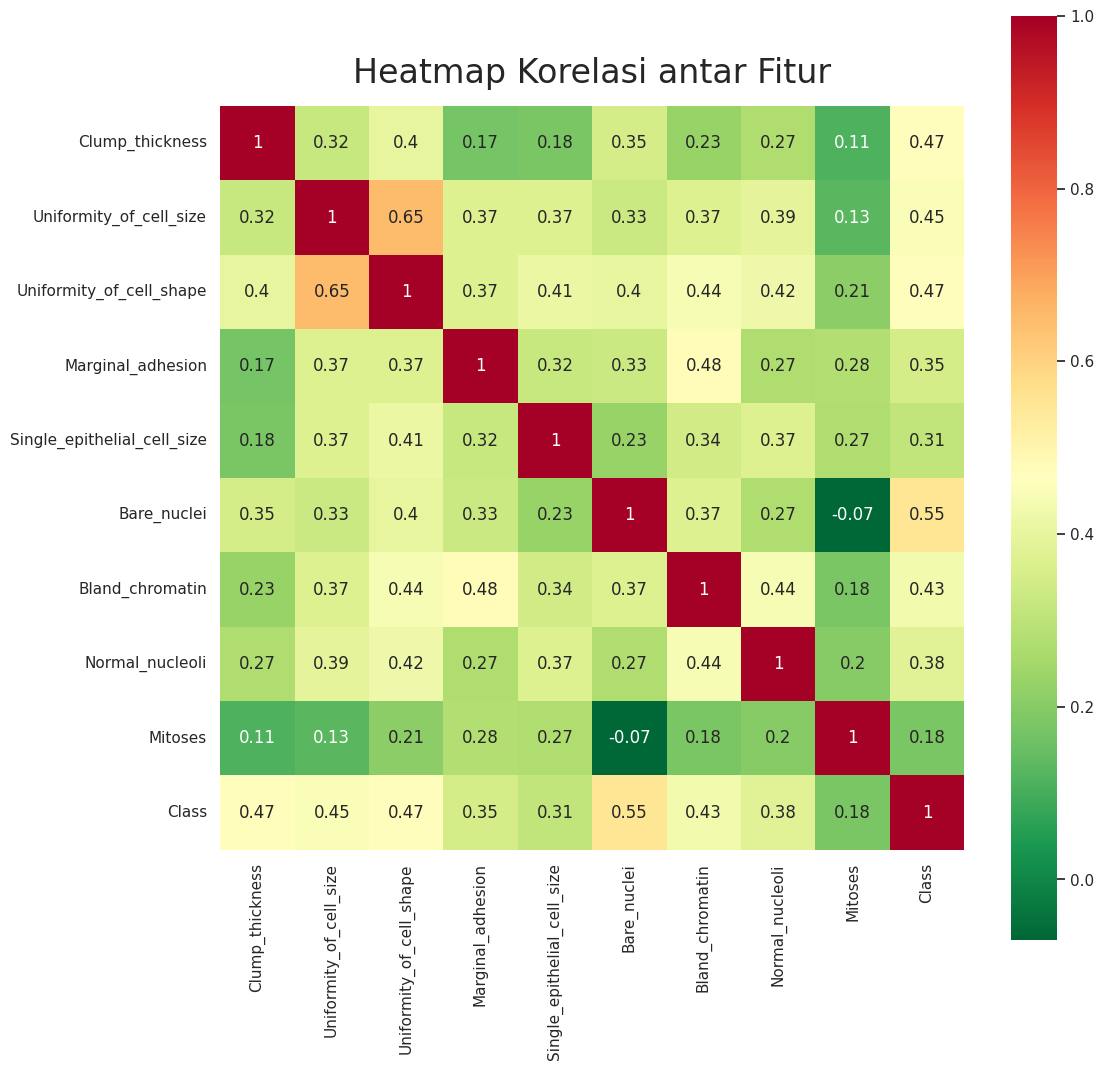

In [ ]:
# Menampilkan Korelasi antar Fitur
correlation = dataClean.corr()
plt.figure(figsize=(12, 12))
plt.title("Heatmap Korelasi antar Fitur", y=1.02, fontdict={'size': 24})
sns.heatmap(
  correlation.round(2),
  annot = True,       #menampilkan nilai korelasi di dalam sel heatmap
  vmax = 1,           #nilai maksimum untuk skala warna heatmap
  square = True,      #heatmap berbentuk persegi
  cmap = 'RdYlGn_r'   #skema warna yang digunakan
)
#dari heatmap, bare_nuclei paling berdampak pada klasifikasi(target "class"). angka heatmap = 0,55
plt.show()

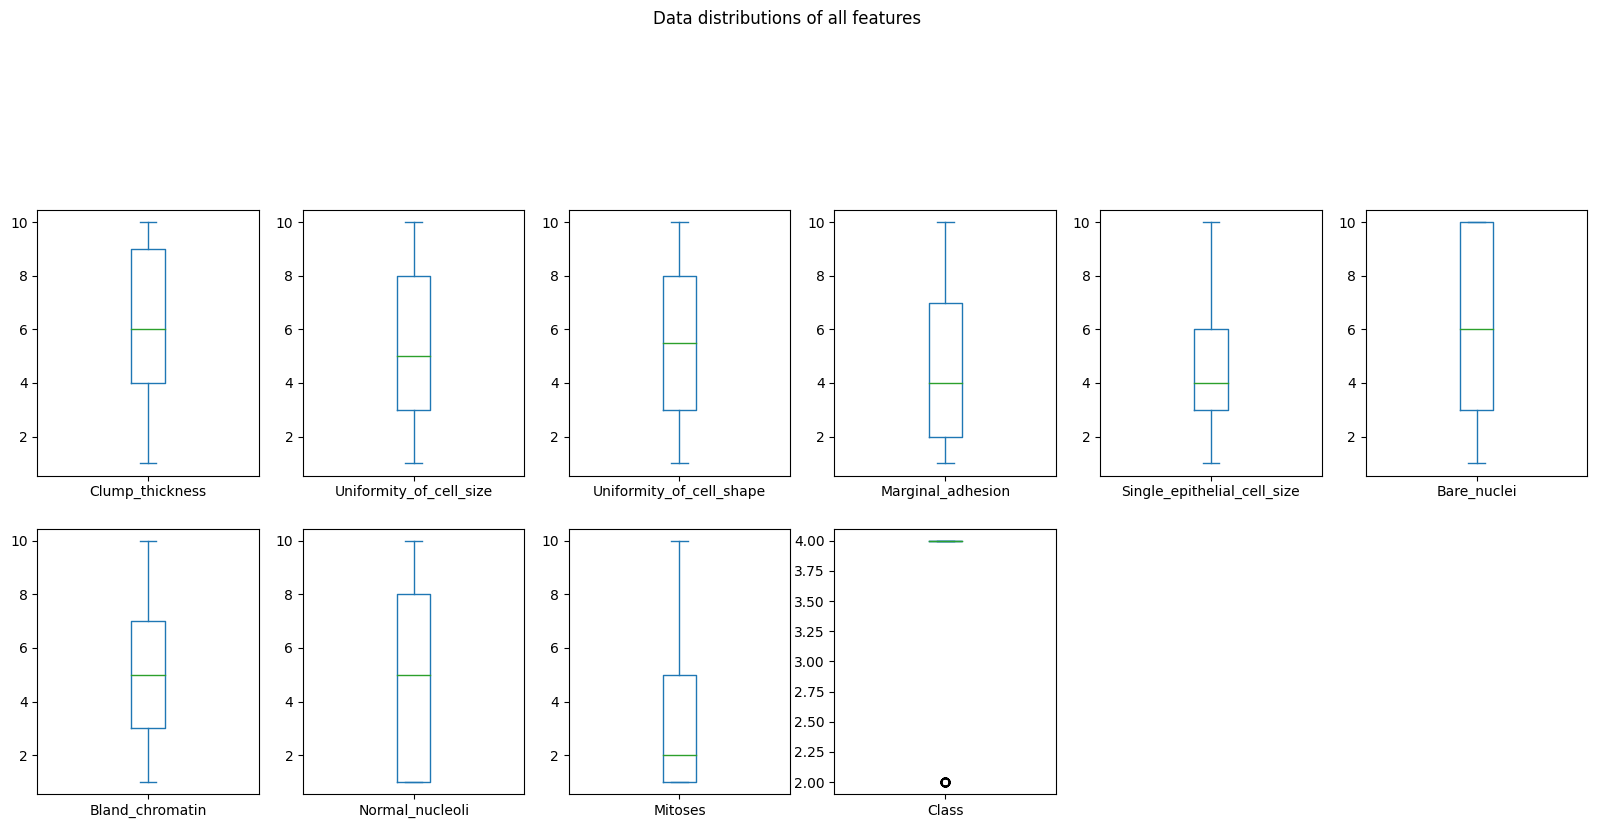

In [ ]:
# Menampilkan Boxplot untuk melihat adanya Outlayer
ax = dataClean.plot(
  kind='box',
  subplots=True,    #menentukan plot yang dihasilkan dalam subplots terpisah untuk setiap fitur atau tidak
  layout=(5, 6),    #menentukan tata letak (layout) dari subplots, ada 5 baris dan 6 kolom subplot
  sharex=False,     #setiap subplot akan memiliki sumbu x yang berbeda
  figsize=(20, 20),
  title='Data distributions of all features'
)

plt.show()

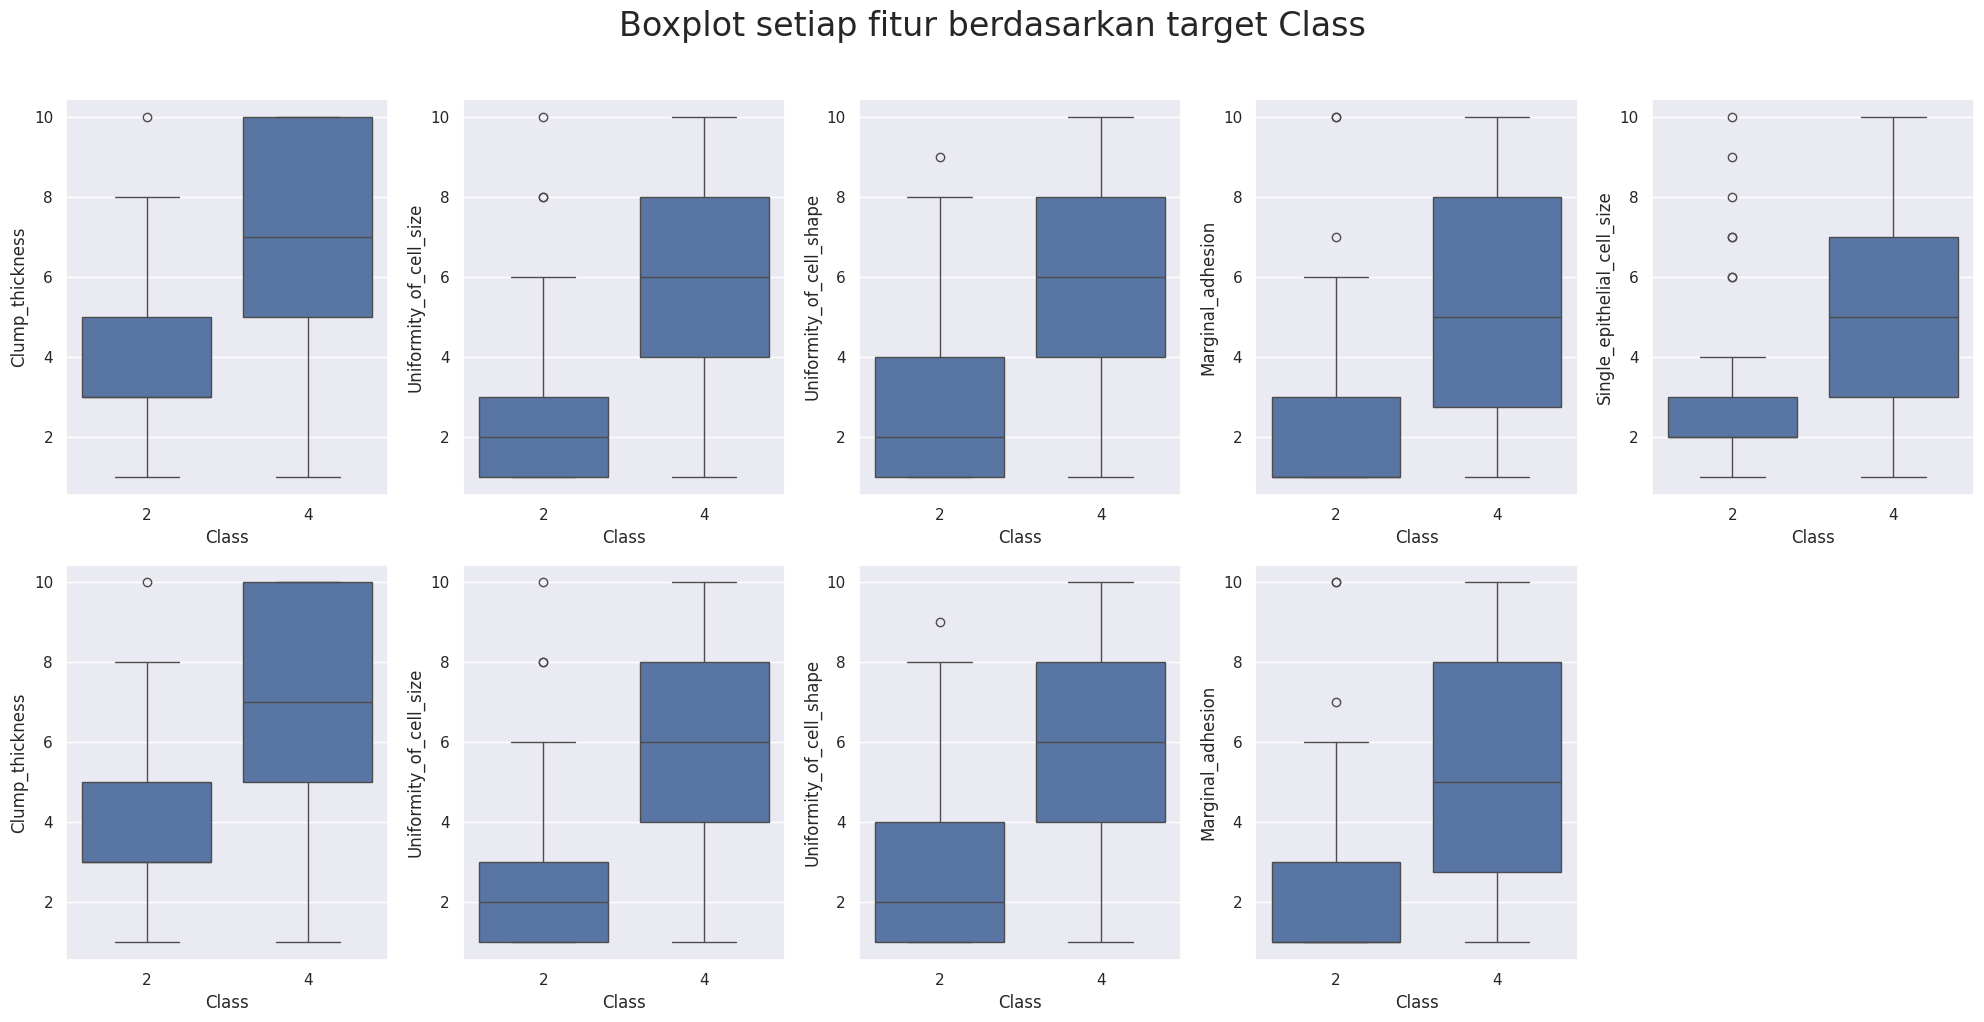

In [ ]:
plot_data = dataClean

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i in range(5):    #baris pertama subplot
  sns.boxplot(x=plot_data.columns[-1], y=plot_data.columns[i], data=plot_data, ax=axes[0, i])
for i in range(4):    #baris kedua subplot
  sns.boxplot(x=plot_data.columns[-1], y=plot_data.columns[i], data=plot_data, ax=axes[1, i])

fig.suptitle("Boxplot setiap fitur berdasarkan target Class", fontsize=24, y=1.02)
fig.delaxes(axes[1, 4]) # menghapus subplot kosong
plt.tight_layout()      #menyesuaikan tata letak subplot agar lebih rapi di dalam gambar (figure)

plt.show()

In [ ]:
#menampilkan deskripsi data yang sudah dibersihkan
dataClean.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325000,5.285000,5.450000,4.710000,4.74500,6.195000,5.240000,5.040000,3.110000,3.600000
std,2.765432,2.999795,2.910301,3.186955,2.63528,3.400706,2.696061,3.369744,2.797684,0.802008
min,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,4.000000,3.000000,3.000000,2.000000,3.00000,3.000000,3.000000,1.000000,1.000000,4.000000
50%,6.000000,5.000000,5.500000,4.000000,4.00000,6.000000,5.000000,5.000000,2.000000,4.000000
75%,9.000000,8.000000,8.000000,7.000000,6.00000,10.000000,7.000000,8.000000,5.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
dataClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 257
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              200 non-null    int64  
 1   Uniformity_of_cell_size      200 non-null    int64  
 2   Uniformity_of_cell_shape     200 non-null    int64  
 3   Marginal_adhesion            200 non-null    int64  
 4   Single_epithelial_cell_size  200 non-null    int64  
 5   Bare_nuclei                  200 non-null    float64
 6   Bland_chromatin              200 non-null    int64  
 7   Normal_nucleoli              200 non-null    int64  
 8   Mitoses                      200 non-null    int64  
 9   Class                        200 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 17.2 KB


In [ ]:
dataClean

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,2,3,4,4,2,5.0,2,5,1,4
1,10,3,3,10,2,10.0,7,3,3,4
2,3,10,3,10,6,10.0,5,1,4,4
3,10,3,5,1,10,5.0,3,10,2,4
4,10,5,5,3,6,7.0,7,10,1,4
...,...,...,...,...,...,...,...,...,...,...
252,8,3,5,4,5,10.0,1,6,2,4
254,7,5,9,9,10,5.0,10,8,2,4
255,8,4,4,1,2,9.0,3,3,1,4
256,9,10,6,2,3,4.0,1,10,5,4


## <b>7) Menentukan Label Data</b> <a class="anchor" id="h7"></a>

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = dataClean.drop('Class', axis=1).values
y = dataClean['Class']

In [ ]:
# perbandingan data training dan data testing adalah 70 : 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## <b>8) Membangun Model</b> <a class="anchor" id="h8"></a>

In [ ]:
# import library pemodelan yang digunakan
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clean_classifier_nb = GaussianNB()
clean_classifier_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
clean_classifier_dt = DecisionTreeClassifier(random_state=42)
clean_classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
clean_classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clean_classifier_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## <b>9) Mengevaluasi Hasil Pemodelan</b> <a class="anchor" id="h9"></a>

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix, precision_score

In [ ]:
def evaluation(y_test, y_pred):
  acc = accuracy_score(y_test, y_pred)
  rcl = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')
  ps = precision_score(y_test, y_pred, average='weighted')

  metric_dict = {
    'accuracy': round(acc, 3),
    'recall': round(rcl, 3),
    'F1 score': round(f1, 3),
    'Precision score': round(ps, 3)
  }

  return print(metric_dict)

In [ ]:
y_pred_nb = clean_classifier_nb.predict(X_test)

# Evaluate the Gaussian NB model
print("\nGaussian NB Model:")
accuracy_nb = round(accuracy_score(y_test, y_pred_nb), 3)
print("Accuracy:",accuracy_nb)
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))


Gaussian NB Model:
Accuracy: 0.883
Classification Report:
              precision    recall  f1-score   support

           2       0.57      0.89      0.70         9
           4       0.98      0.88      0.93        51

    accuracy                           0.88        60
   macro avg       0.77      0.89      0.81        60
weighted avg       0.92      0.88      0.89        60



In [ ]:
evaluation(y_test, y_pred_nb)

{'accuracy': 0.883, 'recall': 0.883, 'F1 score': 0.893, 'Precision score': 0.917}


In [ ]:
y_pred_dt = clean_classifier_dt.predict(X_test)

# Evaluate the Decision Tree model
print("\nDecision Tree Model:")
accuracy_dt = round(accuracy_score(y_test, y_pred_dt), 3)
print("Accuracy:", accuracy_dt)
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Model:
Accuracy: 0.783
Classification Report:
              precision    recall  f1-score   support

           2       0.39      0.78      0.52         9
           4       0.95      0.78      0.86        51

    accuracy                           0.78        60
   macro avg       0.67      0.78      0.69        60
weighted avg       0.87      0.78      0.81        60



In [ ]:
evaluation(y_test, y_pred_dt)

{'accuracy': 0.783, 'recall': 0.783, 'F1 score': 0.809, 'Precision score': 0.868}


In [ ]:
y_pred_rf = clean_classifier_rf.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf = round(accuracy_score(y_test, y_pred_rf), 3)
print("Accuracy:", accuracy_rf)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.933
Classification Report:
              precision    recall  f1-score   support

           2       0.78      0.78      0.78         9
           4       0.96      0.96      0.96        51

    accuracy                           0.93        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.93      0.93      0.93        60



In [ ]:
evaluation(y_test, y_pred_rf)

{'accuracy': 0.933, 'recall': 0.933, 'F1 score': 0.933, 'Precision score': 0.933}


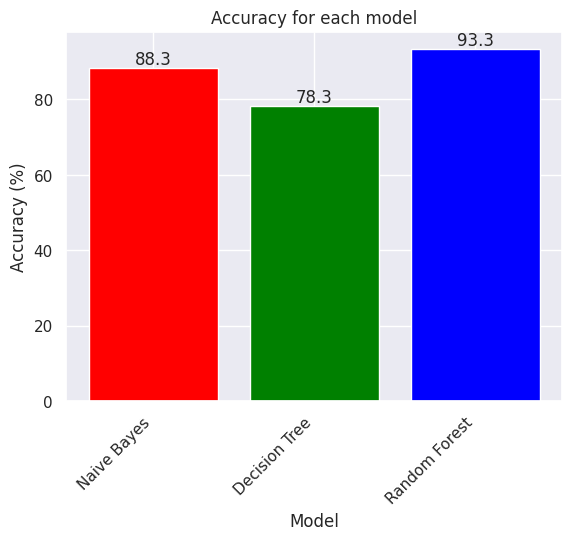

In [ ]:
model_comp = pd.DataFrame({
  'Model': ['Naive Bayes', 'Decision Tree', 'Random Forest'],
  'Accuracy': [accuracy_nb*100, accuracy_dt*100, accuracy_rf*100]
})

# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp['Model'], model_comp['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy for each model')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

## <b>10) Optimasi Model Klasifikasi</b> <a class="anchor" id="h10"></a>

In [ ]:
from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import RandomUnderSampler

X = dataClean.drop(columns=['Class'])
y = dataClean['Class']

smote = SMOTE(random_state=42)
#rus = RandomUnderSampler(random_state=42)

# Resampling data menggunakan SMOTE

X_resampled, y_resampled = smote.fit_resample(X, y)

dataResampled = X_resampled
dataResampled['Class'] = y_resampled

print("Jumlah baris data setelah resampling: {}".format(dataResampled.shape[0]))

Jumlah baris data setelah resampling: 320


Class
4    160
2    160
Name: count, dtype: int64


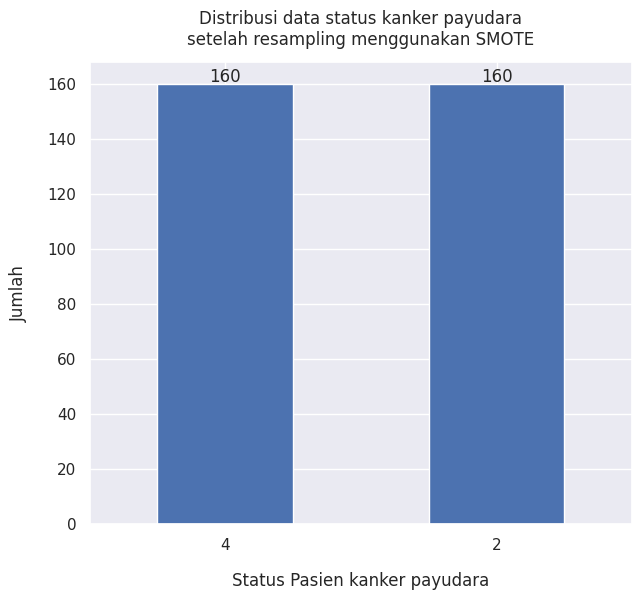

In [ ]:
plot_data = dataResampled['Class'].value_counts()
print(plot_data)
sns.set_theme(font_scale=1.0)
plot_data.plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Status Pasien kanker payudara", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi data status kanker payudara\nsetelah resampling menggunakan SMOTE", y=1.02);

for i, counts in enumerate(plot_data):
  plt.text(i, (counts + 1), str(counts), ha='center')

plt.show()

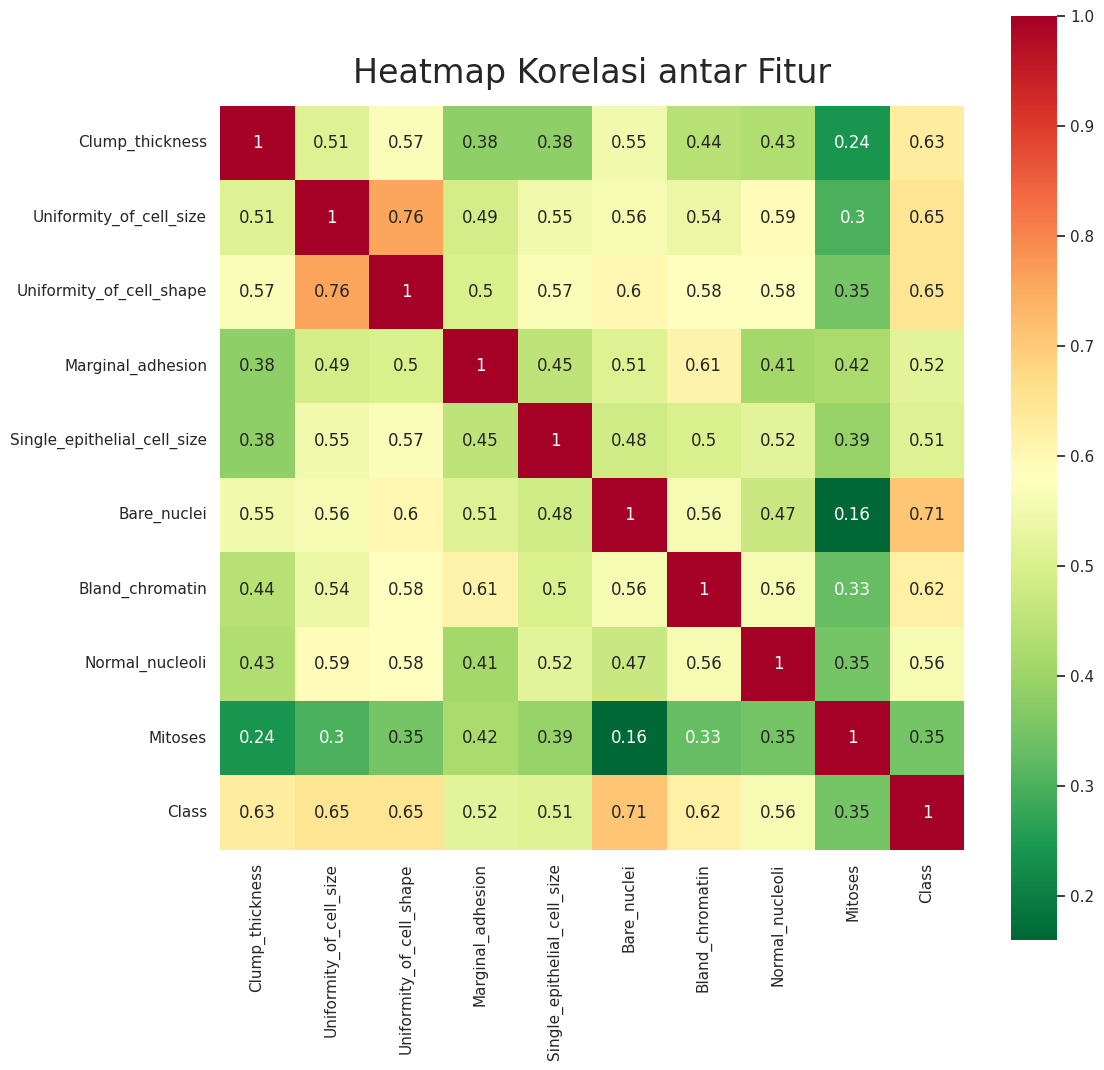

In [ ]:
# Menampilkan Korelasi antar Fitur
correlation = dataResampled.corr()
plt.figure(figsize=(12, 12))
plt.title("Heatmap Korelasi antar Fitur", y=1.02, fontdict={'size': 24})
sns.heatmap(
  correlation.round(2),
  annot = True,
  vmax = 1,
  square = True,
  cmap = 'RdYlGn_r'
)

plt.show()

In [ ]:
columns_to_drop = [
  'Mitoses',
  'Class'
]

X_selected = dataResampled.drop(columns_to_drop, axis=1).values
y = dataResampled['Class']

In [ ]:
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y, test_size=0.3, random_state=42)

In [ ]:
optimized_classifier_nb = GaussianNB()
optimized_classifier_nb.fit(X_train_selected, y_train_selected)

GaussianNB()

In [ ]:
optimized_classifier_dt = DecisionTreeClassifier(random_state=42)
optimized_classifier_dt.fit(X_train_selected, y_train_selected)

DecisionTreeClassifier(random_state=42)

In [ ]:
optimized_classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
optimized_classifier_rf.fit(X_train_selected, y_train_selected)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_nb_optimized = optimized_classifier_nb.predict(X_test_selected)

# Evaluate the Optimized Gaussian NB model
print("\nOptimized Gaussian NB Model:")
accuracy_nb_optimized = round(accuracy_score(y_test_selected, y_pred_nb_optimized), 3)
print("Accuracy:", accuracy_nb_optimized)
print("Classification Report:")
print(classification_report(y_test_selected, y_pred_nb_optimized))


Optimized Gaussian NB Model:
Accuracy: 0.906
Classification Report:
              precision    recall  f1-score   support

           2       0.90      0.88      0.89        42
           4       0.91      0.93      0.92        54

    accuracy                           0.91        96
   macro avg       0.91      0.90      0.90        96
weighted avg       0.91      0.91      0.91        96



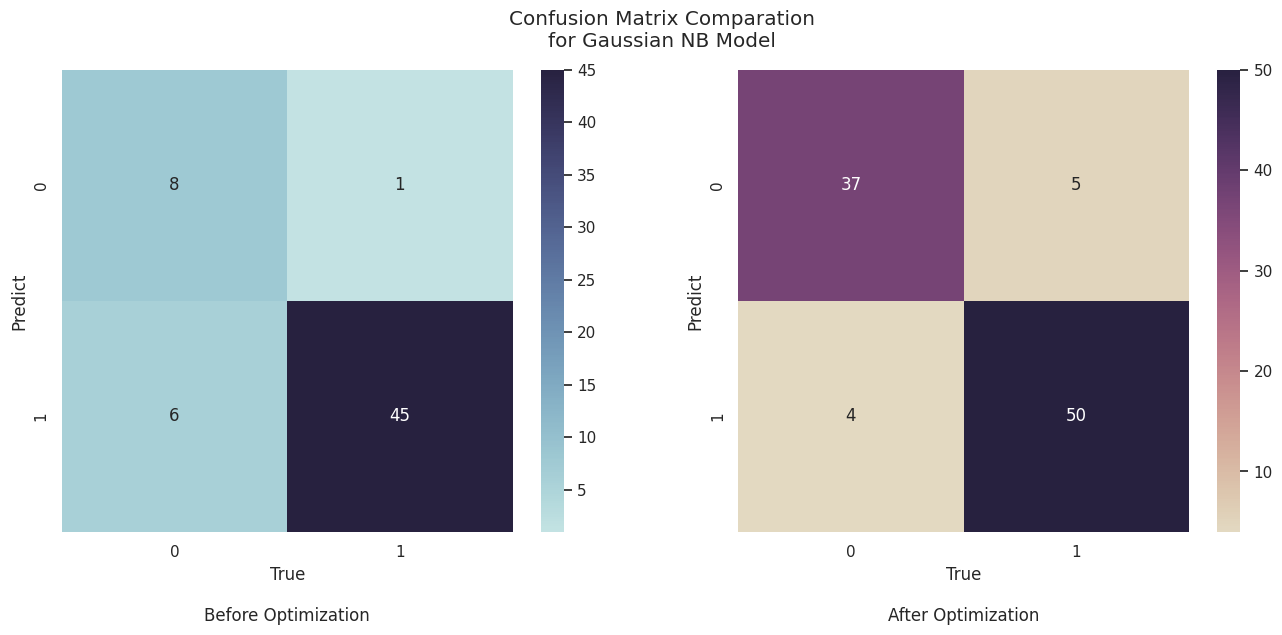

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb)
cm_optimized = confusion_matrix(y_test_selected, y_pred_nb_optimized)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.heatmap(cm, annot=True, fmt="d", cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True), ax=ax[0])
sns.heatmap(cm_optimized, annot=True, fmt="d", cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True), ax=ax[1])

ax[0].set_ylabel('Predict')
ax[0].set_xlabel('True\n\nBefore Optimization')

ax[1].set_ylabel('Predict')
ax[1].set_xlabel('True\n\nAfter Optimization')

fig.suptitle("Confusion Matrix Comparation\nfor Gaussian NB Model")

plt.show()

In [ ]:
y_pred_dt_optimized = optimized_classifier_dt.predict(X_test_selected)

# Evaluate the Optimized Decision Tree model
print("\nOptimized Decision Tree Model:")
accuracy_dt_optimized = round(accuracy_score(y_test_selected, y_pred_dt_optimized), 3)
print("Accuracy:", accuracy_dt_optimized)
print("Classification Report:")
print(classification_report(y_test_selected, y_pred_dt_optimized))


Optimized Decision Tree Model:
Accuracy: 0.885
Classification Report:
              precision    recall  f1-score   support

           2       0.82      0.95      0.88        42
           4       0.96      0.83      0.89        54

    accuracy                           0.89        96
   macro avg       0.89      0.89      0.89        96
weighted avg       0.90      0.89      0.89        96



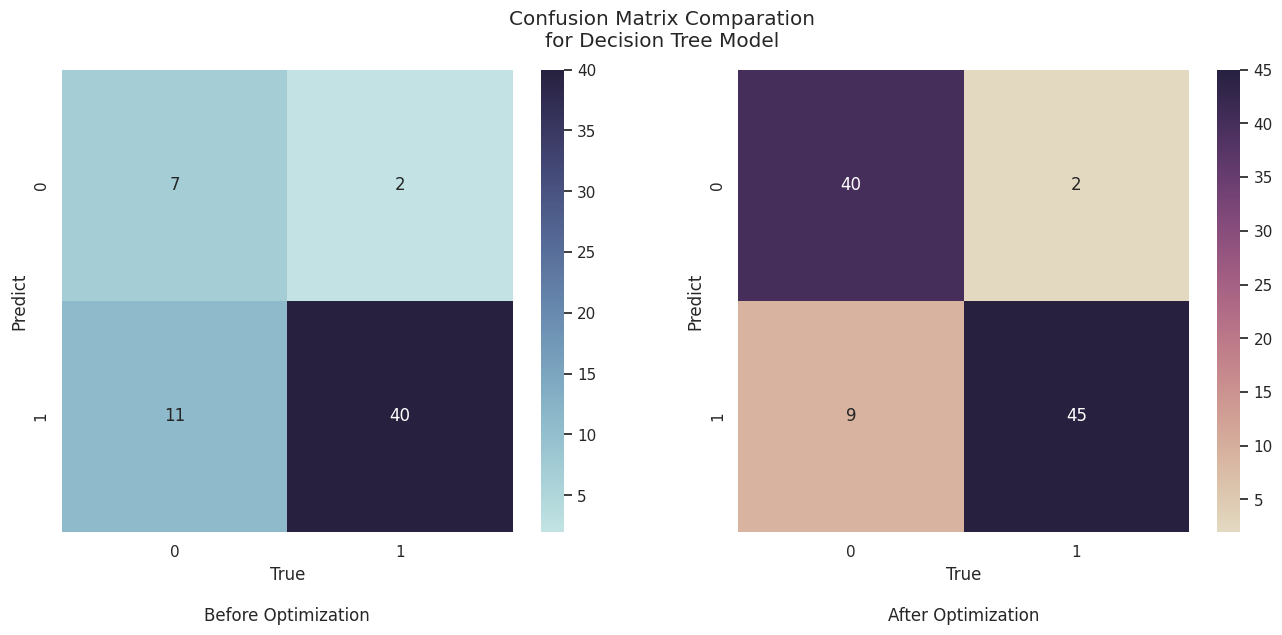

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt)
cm_optimized = confusion_matrix(y_test_selected, y_pred_dt_optimized)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.heatmap(cm, annot=True, fmt="d", cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True), ax=ax[0])
sns.heatmap(cm_optimized, annot=True, fmt="d", cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True), ax=ax[1])

ax[0].set_ylabel('Predict')
ax[0].set_xlabel('True\n\nBefore Optimization')

ax[1].set_ylabel('Predict')
ax[1].set_xlabel('True\n\nAfter Optimization')

fig.suptitle("Confusion Matrix Comparation\nfor Decision Tree Model")

plt.show()

In [ ]:
y_pred_rf_optimized = optimized_classifier_rf.predict(X_test_selected)

# Evaluate the Optimized Random Forest model
print("\nOptimized Random Forest Model:")
accuracy_rf_optimized = round(accuracy_score(y_test_selected, y_pred_rf_optimized), 3)
print("Accuracy:", accuracy_rf_optimized)
print("Classification Report:")
print(classification_report(y_test_selected, y_pred_rf_optimized))


Optimized Random Forest Model:
Accuracy: 0.958
Classification Report:
              precision    recall  f1-score   support

           2       0.95      0.95      0.95        42
           4       0.96      0.96      0.96        54

    accuracy                           0.96        96
   macro avg       0.96      0.96      0.96        96
weighted avg       0.96      0.96      0.96        96



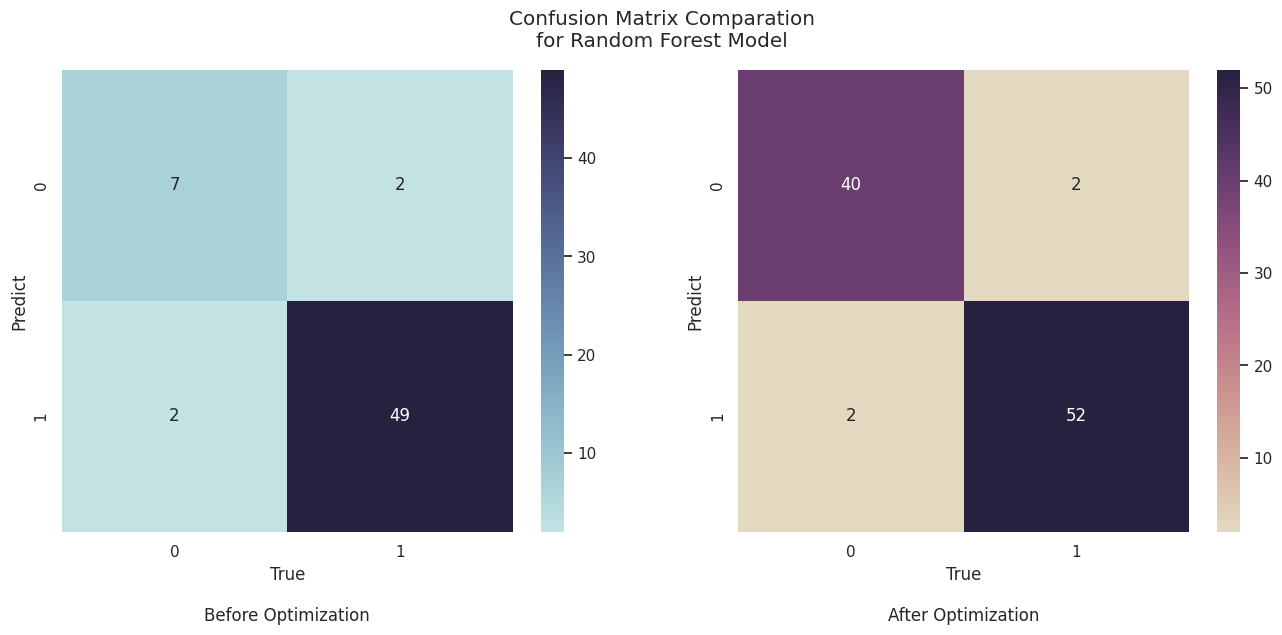

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
cm_optimized = confusion_matrix(y_test_selected, y_pred_rf_optimized)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.heatmap(cm, annot=True, fmt="d", cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True), ax=ax[0])
sns.heatmap(cm_optimized, annot=True, fmt="d", cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True), ax=ax[1])

ax[0].set_ylabel('Predict')
ax[0].set_xlabel('True\n\nBefore Optimization')

ax[1].set_ylabel('Predict')
ax[1].set_xlabel('True\n\nAfter Optimization')

fig.suptitle("Confusion Matrix Comparation\nfor Random Forest Model")

plt.show()

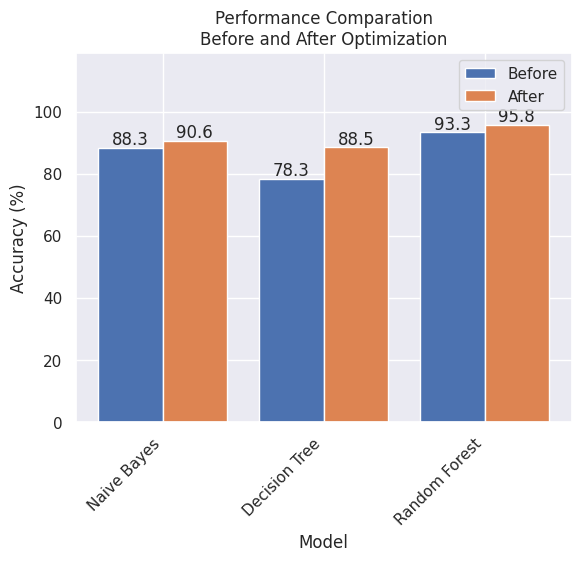

In [ ]:
import numpy as np    #Numerical Python, library untuk komputasi numerik di Python. menyediakan objek array yang mendukung operasi matematika, serta fungsi matematika untuk data numerik

model_name = ['Naive Bayes', 'Decision Tree', 'Random Forest']
before_optimization = [accuracy_nb*100, accuracy_dt*100, accuracy_rf*100]
after_optimization = [accuracy_nb_optimized*100, accuracy_dt_optimized*100, accuracy_rf_optimized*100]

X_axis = np.arange(len(model_name))

bars_1 = plt.bar(X_axis - 0.2, before_optimization, 0.4, label='Before')
bars_2 = plt.bar(X_axis + 0.2, after_optimization, 0.4, label='After')

for i, counts in enumerate(before_optimization):
  plt.text(i - 0.2, (counts + 1), str(round(counts, 1)), ha='center')

for i, counts in enumerate(after_optimization):
  plt.text(i + 0.2, (counts + 1), str(round(counts, 1)), ha='center')

plt.xticks(X_axis, model_name, rotation=45, ha='right')

plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Performance Comparation\nBefore and After Optimization')

plt.ylim(None, 119)
plt.legend()

plt.show()